In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Correlation 
                age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000 
 
 Pairplot


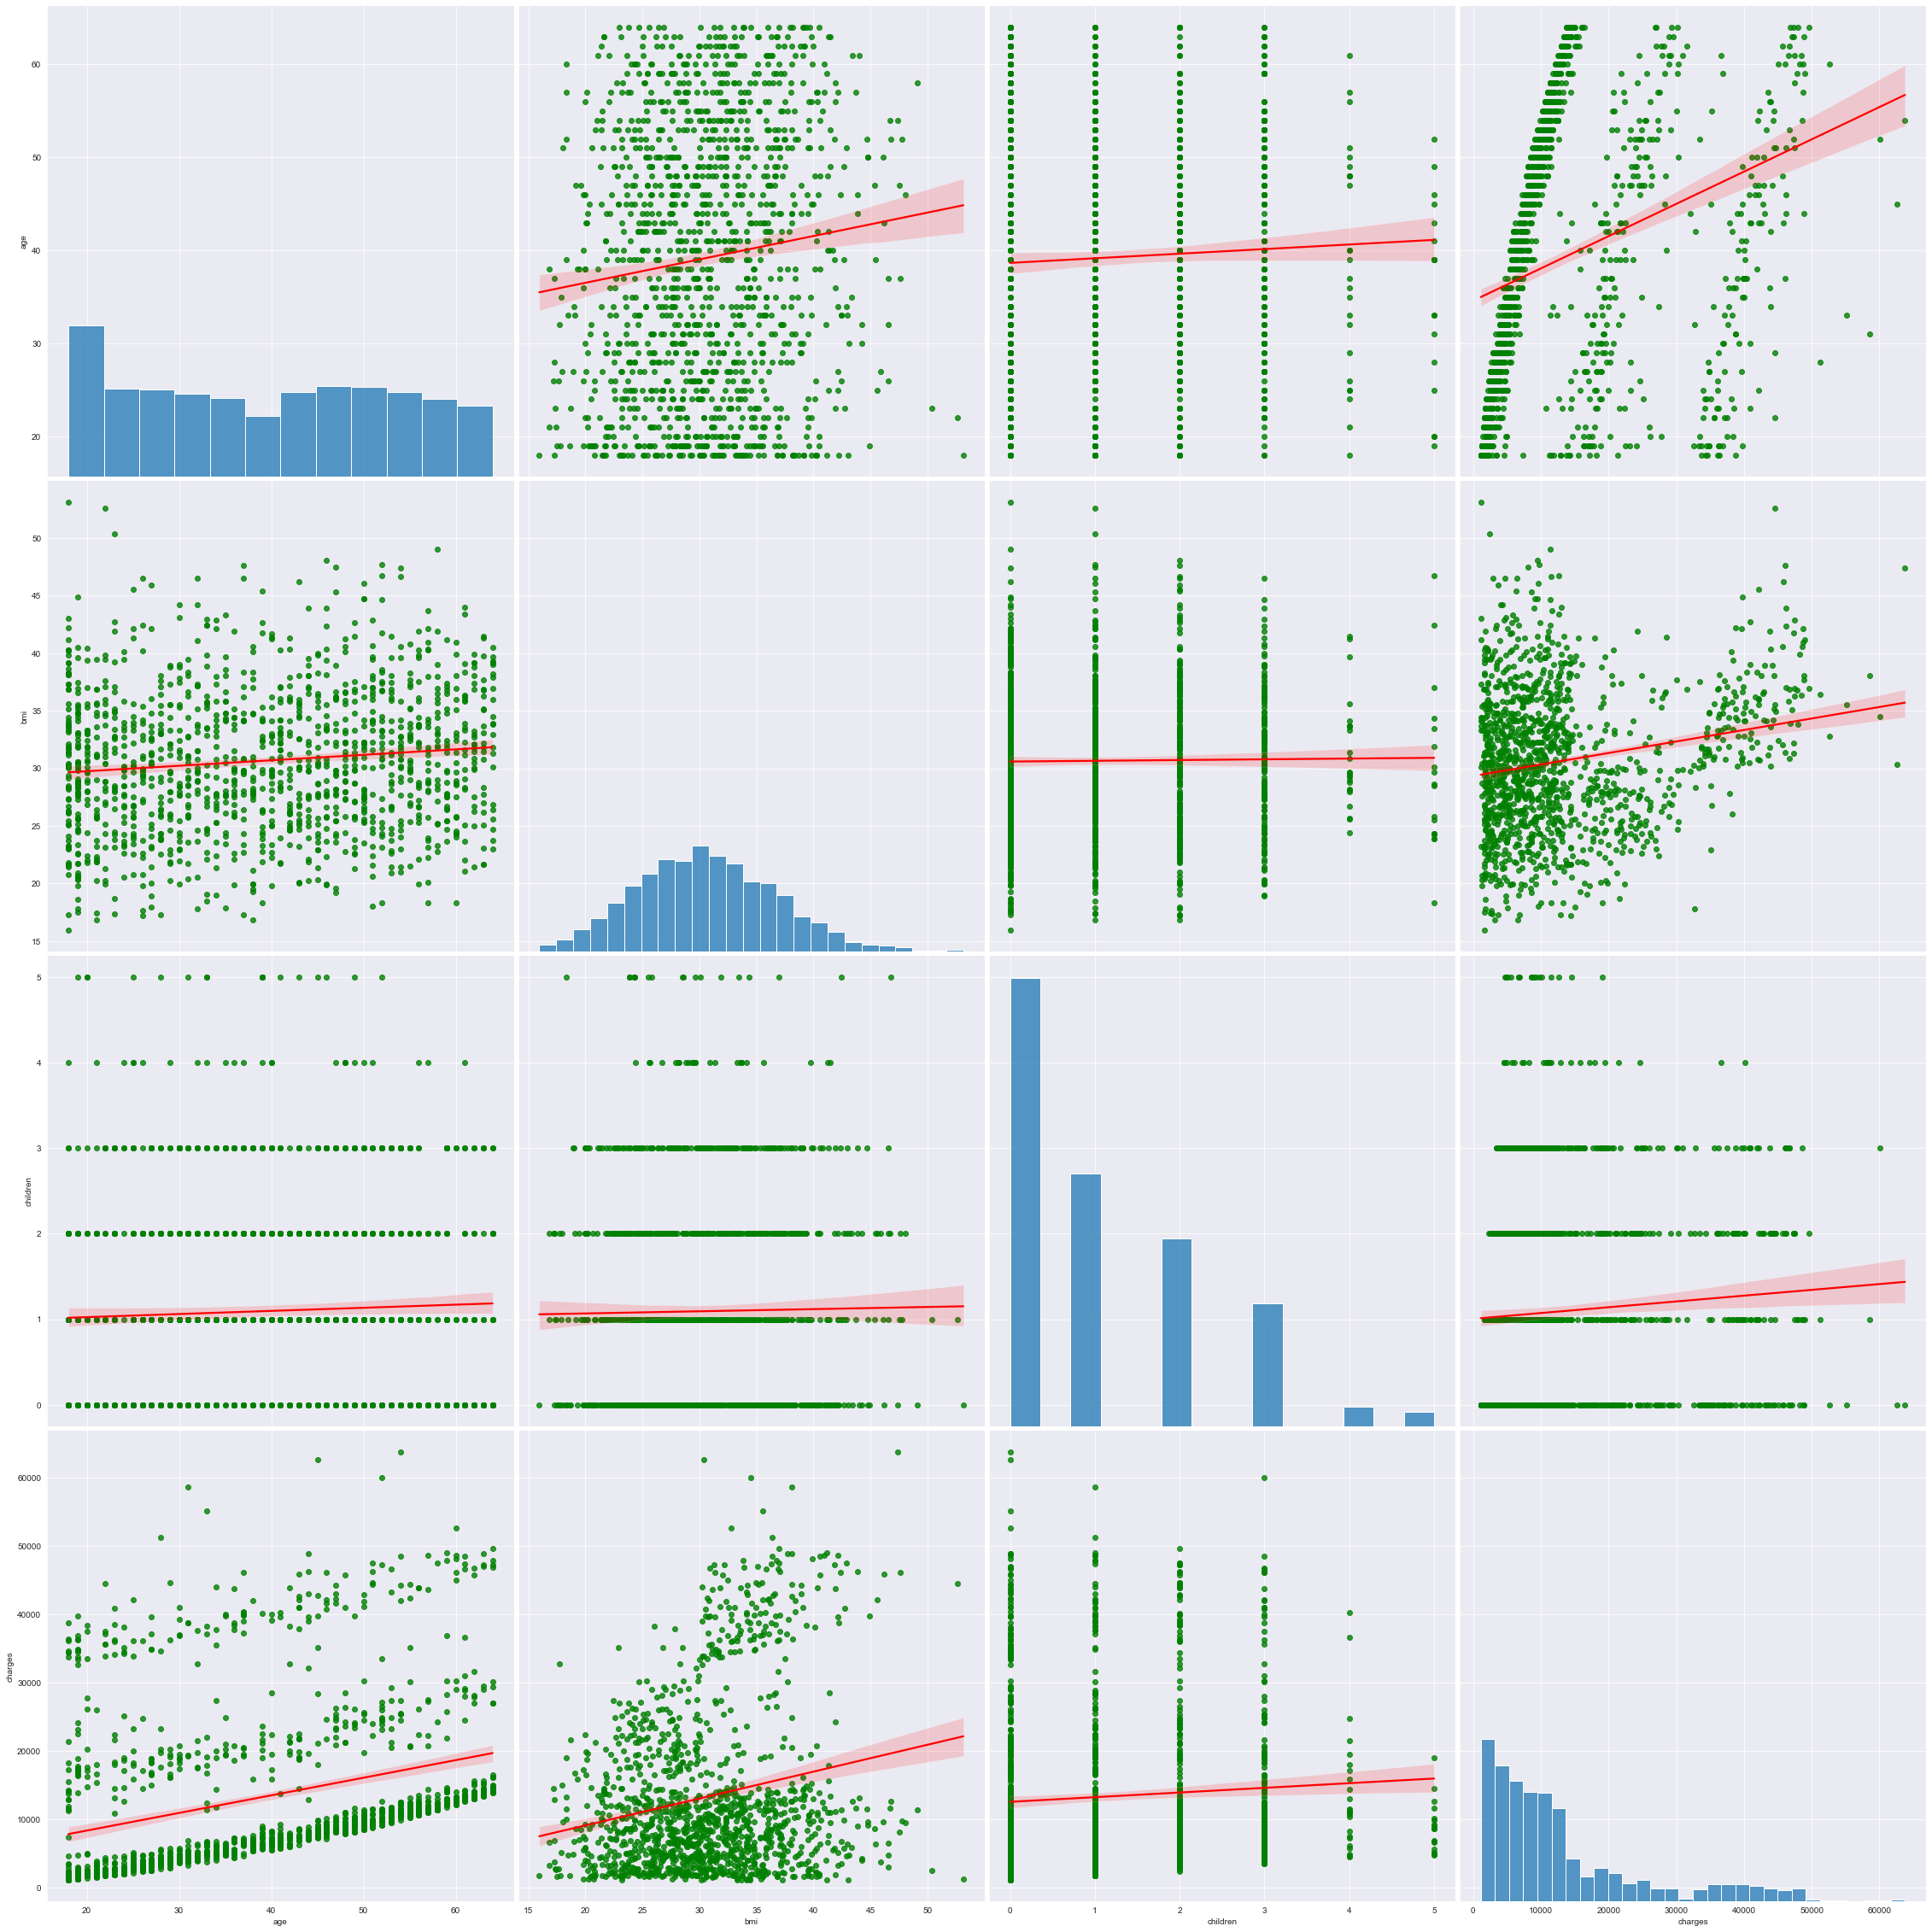

In [2]:
df=pd.read_csv('insurance.csv')
sns.set_style('darkgrid')
sns.pairplot(df, kind='reg', plot_kws={'line_kws': {'color':'red'}, 'scatter_kws': {'color':'green'}}, height=8) 
print(f'Correlation \n', df.corr(), '\n \n Pairplot')

In [ ]:
'''
Analysis:

The above figure is called Pairplot. The red line resembles the correlation between the X and Y axis. From the pairplot, we can
understand that the maximum correlation is available between Age and Charges which is 0.299008. Noticeably, there are a very low
correlation is seen among the features and target in this graph. The lowest correlation is seen between BMI and Children which is
0.012759.

'''

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.datasets import make_regression
%matplotlib inline

df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df2= pd.DataFrame()
df2['age'], df2['charges']= df['age'], df['charges']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(df2['age'], df2['charges'] )
X_train_df, X_test_df= pd.DataFrame(X_train), pd.DataFrame(X_test)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for i in range(2, 20):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X_train_df)

    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y_train)


    print('degree',i)
    print(r2_score(y_train, pol_reg.predict(X_poly)))

degree 2
0.0998283591369743
degree 3
0.10015503121352543
degree 4
0.10031199384140554
degree 5
0.10391854880289897
degree 6
0.10476043274940994
degree 7
0.10483295287257677
degree 8
0.10471238970179053
degree 9
0.10447600350063513
degree 10
0.10410150564454912
degree 11
0.10361443248809987
degree 12
0.10308811011099495
degree 13
0.10151153728072015
degree 14
0.10141722165153821
degree 15
0.10135530148323191
degree 16
0.10128697322271107
degree 17
0.10118632505203606
degree 18
0.10102787905468091
degree 19
0.1007849182169176


In [7]:
'''
Analysis

The maximum r2 score is seen in Degree 7. So, we will proceed further with this degree. 

'''

'\nAnalysis\n\nThe maximum r2 score is seen in Degree 7. So, we will proceed further with this degree. \n\n'

degree 7
0.10483295287257677


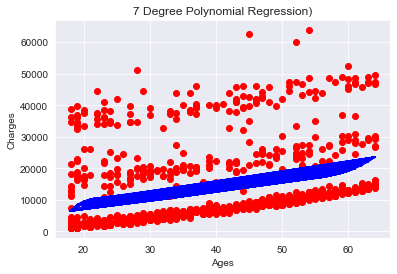

In [8]:
#TrainingData
i=7
poly_reg = PolynomialFeatures(degree=i)
X_poly = poly_reg.fit_transform(X_train_df)

pol_reg = LinearRegression()
model= pol_reg.fit(X_poly, y_train)
print('degree',i)
print(r2_score(y_train, pol_reg.predict(X_poly)))

plt.scatter(X_train_df, y_train, color='red')
plt.plot(X_train, pol_reg.predict((X_poly)), color='blue')
plt.title(f'{i} Degree Polynomial Regression)')
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.show()

In [9]:
X_train_df.iloc[0]

age    55
Name: 1055, dtype: int64

In [10]:
X_poly = poly_reg.fit_transform(X_train_df.iloc[0].values.reshape(1,-1))
pol_reg.predict(X_poly)

array([16911.23817324])

In [11]:
y_train.iloc[0]

10594.50155

In [ ]:
'''
Analysis

The prediction of the target in the train data is not meet as the r2 score as well as the correlation is very low between the 
age and charges.

'''

degree 7
0.07706791865847151


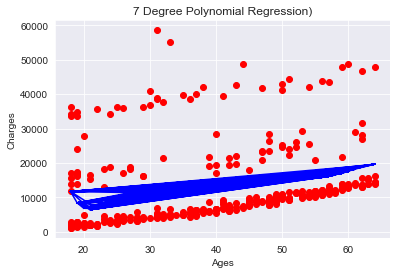

In [12]:
#TestData

poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X_test_df)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_test)

print('degree',i)
print(r2_score(y_test, pol_reg.predict(poly_reg.fit_transform(X_test_df))))

plt.scatter(X_test_df, y_test, color='red')
plt.plot(X_test, pol_reg.predict((X_poly)), color='blue')
plt.title(f'{i} Degree Polynomial Regression)')
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.show()

In [ ]:
'''
Analysis

The r2 score between the test and train data is not met because of a very correlation between the Charges and age. 

'''

In [25]:
X_test_df.iloc[50]

age    54
Name: 474, dtype: int64

In [24]:
X_poly = poly_reg.fit_transform(X_test_df.iloc[50].values.reshape(1,-1))
pol_reg.predict(X_poly)

array([15453.52039981])

In [23]:
y_test.iloc[50]

25382.297

In [ ]:
'''
Analysis

The prediction of the target in the test data is not meet as the r2 score as well as the correlation is very low between the 
age and charges.

'''

In [ ]:
'''
Conclusion: The above dataset has a very low correlation among the features and the target. Thus, the r2 score has come among
them is very improper. As a result, the prediction cannot become accurate. However, the prediction will be higher if the dataset 
can be modified and increased the rate of correlation among them.

'''